## EDA

### Importamos las librerías necesarias para hacer el EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargamos el archivo de trabajo

In [2]:
df = pd.read_csv('datasets/hechos_victimas_depurados.csv')

In [3]:
df.head(4)                              #Revisamos la información del archivo

,ID,N_VICTIMAS,FECHA_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,Longitud,Latitud,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,SD


In [4]:
df.shape                        #Revisamos el frame

(695, 19)

### Hacemos una revisión descriptiva de las variables numéricas

In [5]:
print('Análisis Descriptivo')
print(df.describe())

Análisis Descriptivo
       N_VICTIMAS      COMUNA        EDAD
count  695.000000  695.000000  645.000000
mean     1.030216    7.435971   42.395349
std      0.179519    4.381139   19.828308
min      1.000000    0.000000    1.000000
25%      1.000000    4.000000   27.000000
50%      1.000000    8.000000   37.000000
75%      1.000000   11.000000   57.000000
max      3.000000   15.000000   95.000000


#### Para las variables numéricas se observa lo siguiente:
- La media del número de victimas en los accientes es 1,03 y el máximo de victimas en accidentes es 3
- La media de edad de muertes es de 42 años, con un máximo de 95 años y un mínimo de 1 año y el rango intercuartil está entre 27 y 57 años


### Generamos gráfica boxplot de la variable 'EDAD'

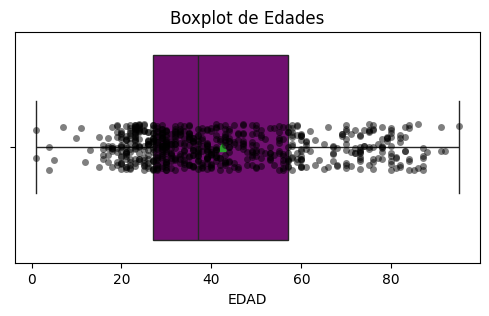

In [9]:
# Crear una figura y ejes para el subplot
fig, ax = plt.subplots(figsize=(6, 3))

# Generar el boxplot para la variable 'EDAD'
sns.boxplot(ax=ax, x=df['EDAD'], color='purple', showfliers=True, showmeans=True)

# Superpone datos originales
sns.stripplot(ax=ax, x=df['EDAD'], color='black', alpha=0.5)

# Añade título al subplot
ax.set_title('Boxplot de Edades')

# Mostrar el gráfico
plt.show()

- Las edades en los niveles de accidentalidad estan uniformemente distribuidas entre los 20 y 80 años, con una mediana de 37 años

### Generamos una gráfica de torta sobre la participación de cada COMUNA en la cantidad de accidentes

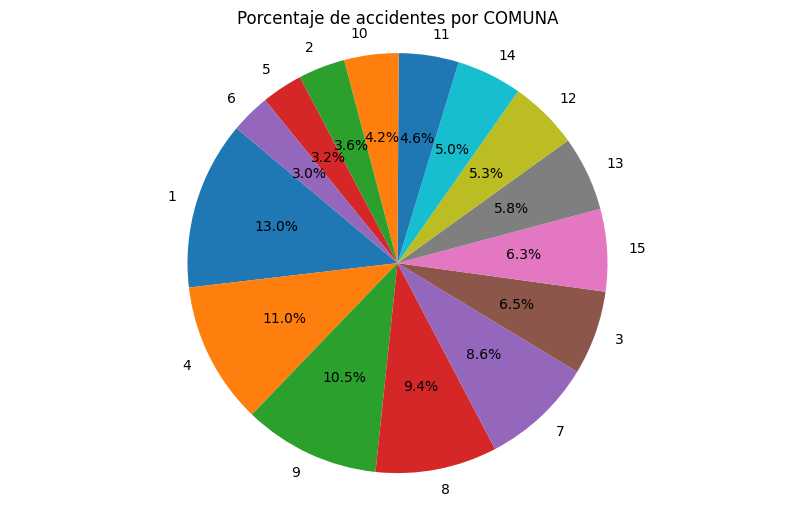

In [12]:
# Filtra para excluir 'COMUNA' = 0
df_filtered = df[df['COMUNA'] != 0]

# Calculamos el número de accidentes por COMUNA
accidentes_por_comuna = df_filtered['COMUNA'].value_counts()

# Creamos la gráfica de torta
plt.figure(figsize=(10, 6))
plt.pie(accidentes_por_comuna, labels=accidentes_por_comuna.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})

# Añadimos título
plt.title('Porcentaje de accidentes por COMUNA')

# Mostramos la gráfica
plt.axis('equal')  # Asegurar que la gráfica sea un círculo
plt.show()

- Se observa que las comunas con mayor participación de accidentes son la 1, 4, 9, 8 y 7

### Graficamos el pareto de participación de las comunas en los accidentes

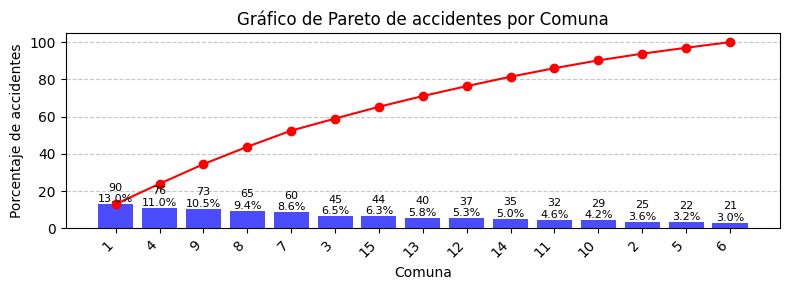

In [20]:
# Filtramos para excluir 'COMUNA' = 0
df_filtered = df[df['COMUNA'] != 0]

# Calculamos el número de accidentes por COMUNA
accidentes_por_comuna = df_filtered['COMUNA'].value_counts()

# Ordenamos las comunas según el orden proporcionado, que es la participación porcentual de mayor a menor
comunas_ordenadas = [1, 4, 9, 8, 7, 3, 15, 13, 12, 14, 11, 10, 2, 5, 6]
accidentes_por_comuna = accidentes_por_comuna.reindex(comunas_ordenadas, fill_value=0)

# Calculamos el porcentaje de accidentes por comuna
porcentaje_por_comuna = accidentes_por_comuna / accidentes_por_comuna.sum() * 100

# Calculamos la suma acumulada de los porcentajes
porcentaje_acumulado = porcentaje_por_comuna.cumsum()

# Creamos la gráfica de Pareto
fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.bar(porcentaje_por_comuna.index.astype(str), porcentaje_por_comuna, color='b', alpha=0.7, align='center')

# Agregamos etiquetas con los valores de los accidentes y porcentaje de participación
for bar, value, percent in zip(bars, accidentes_por_comuna, porcentaje_por_comuna):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value}\n{percent:.1f}%',
             ha='center', va='bottom', fontsize=8)

# Graficamos la línea de la suma acumulada de los porcentajes
ax.plot(porcentaje_acumulado.index.astype(str), porcentaje_acumulado, color='r', marker='o')

# Configuramos ejes y etiquetas
ax.set_xlabel('Comuna')
ax.set_ylabel('Porcentaje de accidentes')
ax.set_title('Gráfico de Pareto de accidentes por Comuna')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(porcentaje_por_comuna.index.astype(str))
ax.set_xticklabels(porcentaje_por_comuna.index.astype(str), rotation=45, ha='right')

# Mostramos la gráfica
plt.tight_layout()
plt.show()

- Obervamos que el pareto de accidentes se generan en las comunas 1, 4, 9, 8, 7, 3, 15, 13 y 12, pero las más significativas son la 1,4,9,8 y 7

### Hacemos un análisis gráfico de las variables categóricas

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15520\2567043491.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_20, y='Cruce', order=top_20_cruces, palette='pastel')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15520\2567043491.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='VICTIMA_x', order=orden_victimas, palette='muted')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15520\2567043491.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='SEXO', palette='dark')


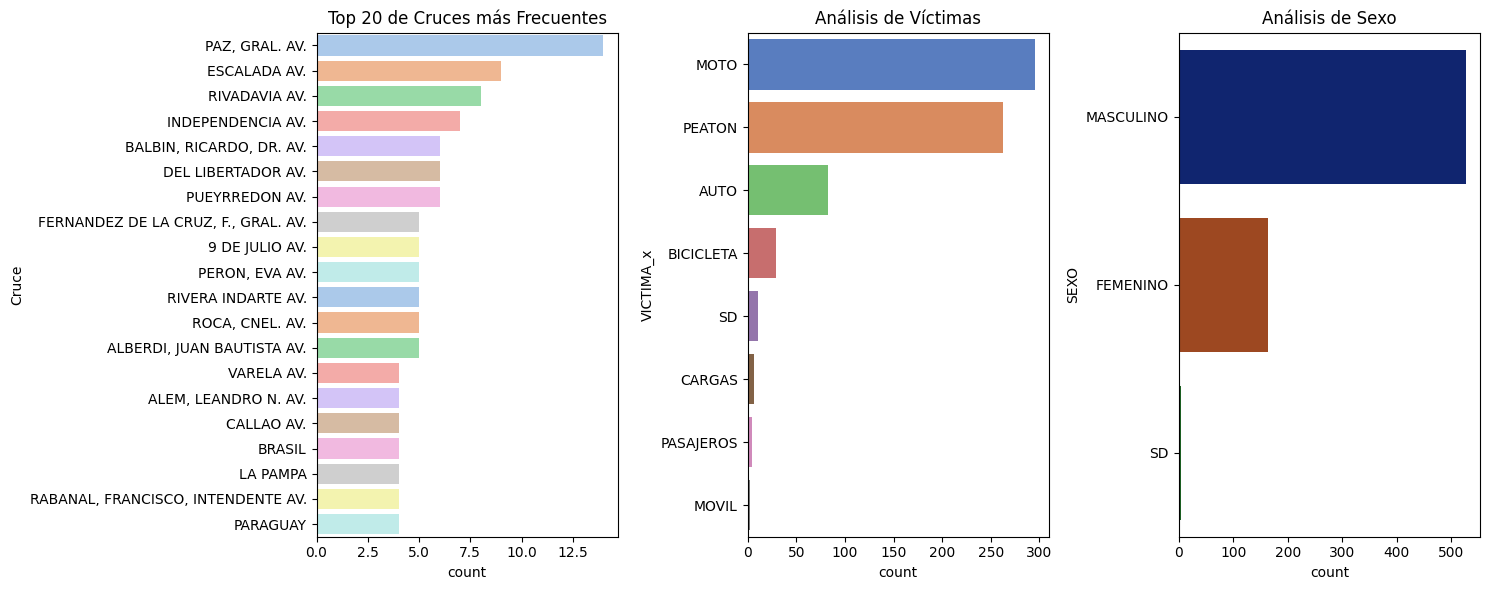

In [58]:
# Obtenemos los top 20 cruces más frecuentes
top_20_cruces = df['Cruce'].value_counts().nlargest(20).index

# Filtramos el DataFrame para incluir solo los top 20 cruces
df_top_20 = df[df['Cruce'].isin(top_20_cruces)]

# Obtenemos el orden de frecuencia descendente para 'VICTIMA_x'
orden_victimas = df['VICTIMA_x'].value_counts().index

# Creamos un gráfico de barras combinado horizontalmente
plt.figure(figsize=(15, 6))

# Cruces más frecuentes
plt.subplot(1, 3, 1)
sns.countplot(data=df_top_20, y='Cruce', order=top_20_cruces, palette='pastel')
plt.title('Top 20 de Cruces más Frecuentes')

# Víctimas ordenadas por frecuencia descendente
plt.subplot(1, 3, 2)
sns.countplot(data=df, y='VICTIMA_x', order=orden_victimas, palette='muted')
plt.title('Análisis de Víctimas')

# Sexo
plt.subplot(1, 3, 3)
sns.countplot(data=df, y='SEXO', palette='dark')
plt.title('Análisis de Sexo')

plt.tight_layout()
plt.show()

#### De las gráficas se puede concluir lo siguiente:
- En el top 20 de los cruces más comunes de accidentes, vemos que el de mayor accidentalidad es PAZ, GRAL. AV.
- En el análisis de víctimas y la frecuencia de ocurrencia de accidentes, el de mayor participación son las motos, seguidas del peatón
- y la mayor cantidad de accidentalidad está determinada por el sexo masculino

### Análisis Bivariado y Multivariado

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15520\3384509828.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='VICTIMA_x', y='EDAD', palette='muted')


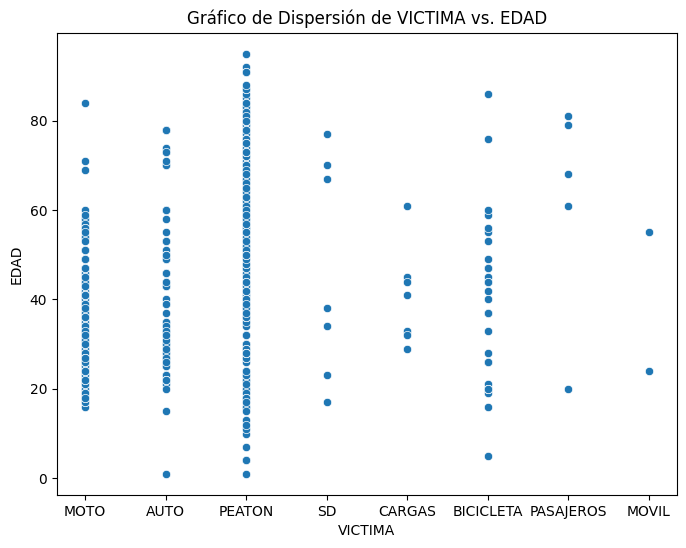

In [59]:
# Creamos un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='VICTIMA_x', y='EDAD', palette='muted')
plt.title('Gráfico de Dispersión de VICTIMA vs. EDAD')
plt.xlabel('VICTIMA')
plt.ylabel('EDAD')
plt.show()

#### Podemos ver en la gráfica de dispersión los siguientes comportamientos de los datos:
- La edad de los accidentes en peatones tiene una distribución normal de 15 a 90 años, con unos outliers de 1, 3 y 95 años. Esto indica que cualquier edad es suceptible de tener un accidente vial.
- En los accidente de motos presenta una distribución normal de los datos de 17 a 60 años, que se condiera una edad normal para manejar este tipo de vehículos.
- Los accidentes de bicicleta tienen un comportamiento parecido a las motos, con menos densidad de datos
- Los accidentes de Cargas, tiene distribución entre 30 y 45 años, que sería una edad normal para este tipo de vehículo.

### Hacemos un análisis de correlación de variables numéricas

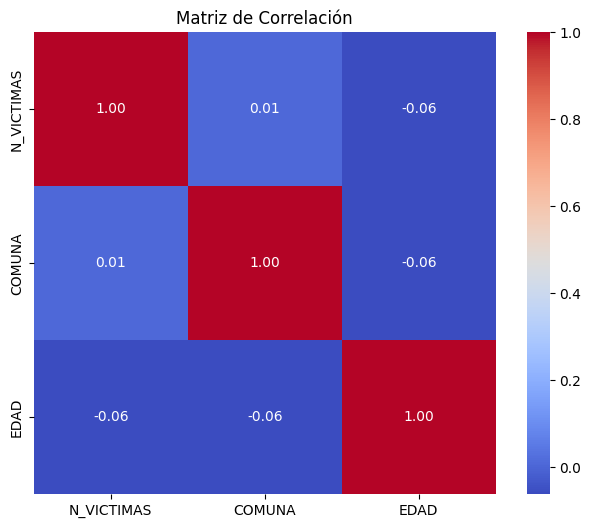

In [21]:
# Seleccionar solo las variables numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcular el índice de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()

- Observamos que no hay una correlación fuerte entre las variables del análisis